##  Ingeniería de características
### Exploración de datos

---------------------------------

##### Desarrollado por Michelle Mejía y Silvia Illescas

In [105]:
import pandas as pd

df = pd.read_csv("Dataset/dataset_pishing.csv")
df.head()


,url,status
0,http://www.crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate


In [106]:
conteo = df['status'].value_counts()

print("Distribución de clases:")
print(conteo)


Distribución de clases:
status
legitimate    5715
phishing      5715
Name: count, dtype: int64


In [107]:
porcentaje = df['status'].value_counts(normalize=True) * 100

print("\nDistribución porcentual:")
print(porcentaje)



Distribución porcentual:
status
legitimate    50.0
phishing      50.0
Name: proportion, dtype: float64


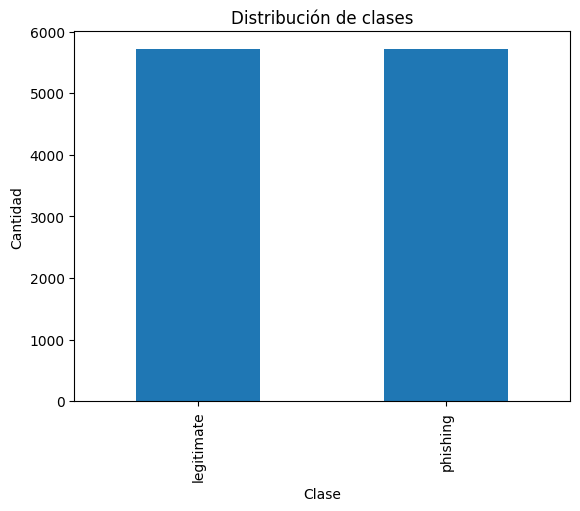

In [108]:
import matplotlib.pyplot as plt

df['status'].value_counts().plot(kind='bar')
plt.title("Distribución de clases")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()


## Funciones de Ingeniería de Características basadas en URL

In [109]:
import re
import math
from urllib.parse import urlparse
from collections import Counter


###  Longitud total de la URL

In [110]:
def url_length(url):
    return len(url)


### Número de puntos (.)

In [111]:
def count_dots(url):
    return url.count('.')


### Número de guiones (-)

In [112]:
def count_hyphens(url):
    return url.count('-')


### Número de subdominios

In [113]:
def count_subdomains(url):
    domain = urlparse(url).netloc
    return domain.count('.') - 1 if domain.count('.') > 1 else 0


### Presencia de dirección IP en vez de dominio

In [114]:
def has_ip(url):
    domain = urlparse(url).netloc
    pattern = r'^\d{1,3}(\.\d{1,3}){3}$'
    return 1 if re.match(pattern, domain) else 0


### Longitud del dominio

In [115]:
def domain_length(url):
    return len(urlparse(url).netloc)


### Número de caracteres especiales

In [116]:
def count_special_chars(url):
    return len(re.findall(r'[^a-zA-Z0-9]', url))


### Número de dígitos

In [117]:
def count_digits(url):
    return sum(c.isdigit() for c in url)


### Ratio dígitos / longitud

In [118]:
def digit_ratio(url):
    return count_digits(url) / len(url) if len(url) > 0 else 0


### Presencia de HTTPS

In [119]:
def has_https(url):
    return 1 if url.startswith("https") else 0


### Número de parámetros (? y =)

In [120]:
def count_parameters(url):
    return url.count('?') + url.count('=')


### Número de barras (/) después del dominio

In [121]:
def count_slashes(url):
    path = urlparse(url).path
    return path.count('/')


### Entropía de Shannon (Shannon Entropy)

In [122]:
def shannon_entropy(url):
    prob = [float(url.count(c)) / len(url) for c in dict.fromkeys(list(url))]
    return -sum([p * math.log2(p) for p in prob if p > 0])


### Entropía relativa (respecto a distribución uniforme)

In [123]:
def relative_entropy(url):
    freq = Counter(url)
    total = len(url)
    probs = [count / total for count in freq.values()]
    
    uniform_prob = 1 / len(freq) if len(freq) > 0 else 0
    
    kl_div = 0
    for p in probs:
        if p > 0 and uniform_prob > 0:
            kl_div += p * math.log2(p / uniform_prob)
    
    return kl_div


### Entropía de caracteres no alfanuméricos (basado en Aung & Yamana)

In [124]:
def nan_entropy(url):
    nan_chars = re.findall(r'[^a-zA-Z0-9]', url)
    if len(nan_chars) == 0:
        return 0
    
    freq = Counter(nan_chars)
    total = len(nan_chars)
    probs = [count / total for count in freq.values()]
    
    return -sum(p * math.log2(p) for p in probs if p > 0)


#### Agregarlas al dataset

In [125]:
df['url_length'] = df['url'].apply(url_length)
df['dot_count'] = df['url'].apply(count_dots)
df['hyphen_count'] = df['url'].apply(count_hyphens)
df['subdomain_count'] = df['url'].apply(count_subdomains)
df['has_ip'] = df['url'].apply(has_ip)
df['domain_length'] = df['url'].apply(domain_length)
df['special_char_count'] = df['url'].apply(count_special_chars)
df['digit_count'] = df['url'].apply(count_digits)
df['digit_ratio'] = df['url'].apply(digit_ratio)
df['has_https'] = df['url'].apply(has_https)
df['parameter_count'] = df['url'].apply(count_parameters)
df['slash_count'] = df['url'].apply(count_slashes)
df['shannon_entropy'] = df['url'].apply(shannon_entropy)
df['relative_entropy'] = df['url'].apply(relative_entropy)
df['nan_entropy'] = df['url'].apply(nan_entropy)


In [126]:
df.head()

,url,status,url_length,dot_count,hyphen_count,subdomain_count,has_ip,domain_length,special_char_count,digit_count,digit_ratio,has_https,parameter_count,slash_count,shannon_entropy,relative_entropy,nan_entropy
0,http://www.crestonwood.com/router.php,legitimate,37,3,0,1,0,19,7,0,0.000000,0,0,1,3.787043,0.212957,1.448816
1,http://shadetreetechnology.com/V4/validation/a...,phishing,77,1,0,0,0,23,7,17,0.220779,0,0,3,4.419864,0.438117,1.148835
2,https://support-appleld.com.secureupdate.duila...,phishing,126,4,1,3,0,50,19,19,0.150794,1,4,3,4.753412,0.290982,2.755058
3,http://rgipt.ac.in,legitimate,18,2,0,1,0,11,5,0,0.000000,0,0,0,3.461320,0.123642,1.521928
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,55,2,2,1,0,15,10,0,0.000000,0,0,3,4.097662,0.224266,1.760964


### Preprocesamiento

In [127]:
import numpy as np
import pandas as pd

# Normalizar texto
df['status'] = df['status'].astype(str).str.strip().str.lower()

# A prueba de typos
map_status = {
    'legit': 0,
    'legitimate': 0,
    'phishing': 1,
    'pishing': 1
}

df['status_bin'] = df['status'].map(map_status)

# Verificar si quedó algún valor sin mapear
if df['status_bin'].isna().any():
    print("Valores no reconocidos en 'status':", df.loc[df['status_bin'].isna(), 'status'].unique())


In [128]:
df.head() #status_bin: 1 si es phishing, 0 si es legítimo

,url,status,url_length,dot_count,hyphen_count,subdomain_count,has_ip,domain_length,special_char_count,digit_count,digit_ratio,has_https,parameter_count,slash_count,shannon_entropy,relative_entropy,nan_entropy,status_bin
0,http://www.crestonwood.com/router.php,legitimate,37,3,0,1,0,19,7,0,0.000000,0,0,1,3.787043,0.212957,1.448816,0
1,http://shadetreetechnology.com/V4/validation/a...,phishing,77,1,0,0,0,23,7,17,0.220779,0,0,3,4.419864,0.438117,1.148835,1
2,https://support-appleld.com.secureupdate.duila...,phishing,126,4,1,3,0,50,19,19,0.150794,1,4,3,4.753412,0.290982,2.755058,1
3,http://rgipt.ac.in,legitimate,18,2,0,1,0,11,5,0,0.000000,0,0,0,3.461320,0.123642,1.521928,0
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,55,2,2,1,0,15,10,0,0.000000,0,0,3,4.097662,0.224266,1.760964,0


In [129]:
import numpy as np

# Target
y = df['status_bin'].astype(int)

# Features: eliminar columnas no numéricas crudas
X = df.drop(columns=['url', 'status', 'status_bin'], errors='ignore')

# Verificar tipos
print(X.dtypes)

# Convertir por seguridad a numérico
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Reemplazar infinitos por NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Imputar posibles NaN con mediana
X = X.fillna(X.median())

print("\nDataset listo para ML")
print("X shape:", X.shape)
print("y shape:", y.shape)


url_length              int64
dot_count               int64
hyphen_count            int64
subdomain_count         int64
has_ip                  int64
domain_length           int64
special_char_count      int64
digit_count             int64
digit_ratio           float64
has_https               int64
parameter_count         int64
slash_count             int64
shannon_entropy       float64
relative_entropy      float64
nan_entropy           float64
dtype: object

Dataset listo para ML
X shape: (11430, 15)
y shape: (11430,)


### Selección de características

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 1) Unir X y y en un solo DataFrame
data = X.copy()
data['status'] = y.values  # o y si ya es Series alineada

print("Antes de duplicados:", data.shape)

# 2) Eliminar duplicados (sobre features + target)
data = data.drop_duplicates()

print("Después de duplicados:", data.shape)

# 3) Separar de nuevo
X_clean = data.drop(columns=['status'])
y_clean = data['status'].astype(int)

print("X_clean:", X_clean.shape, "y_clean:", y_clean.shape)


Antes de duplicados: (11430, 16)
Después de duplicados: (10914, 16)
X_clean: (10914, 15) y_clean: (10914,)


In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unimos X y y para calcular correlación
data_corr = X.copy()
data_corr['status'] = y

corr = data_corr.corr()

# Correlación con la variable objetivo
corr_target = corr['status'].abs().sort_values(ascending=False)

print(corr_target)


status                1.000000
digit_ratio           0.356421
shannon_entropy       0.336562
parameter_count       0.263939
url_length            0.248482
digit_count           0.240425
domain_length         0.238516
slash_count           0.235889
relative_entropy      0.229560
dot_count             0.206965
special_char_count    0.197068
nan_entropy           0.150592
has_https             0.114669
subdomain_count       0.102622
hyphen_count          0.100107
has_ip                0.092033
Name: status, dtype: float64


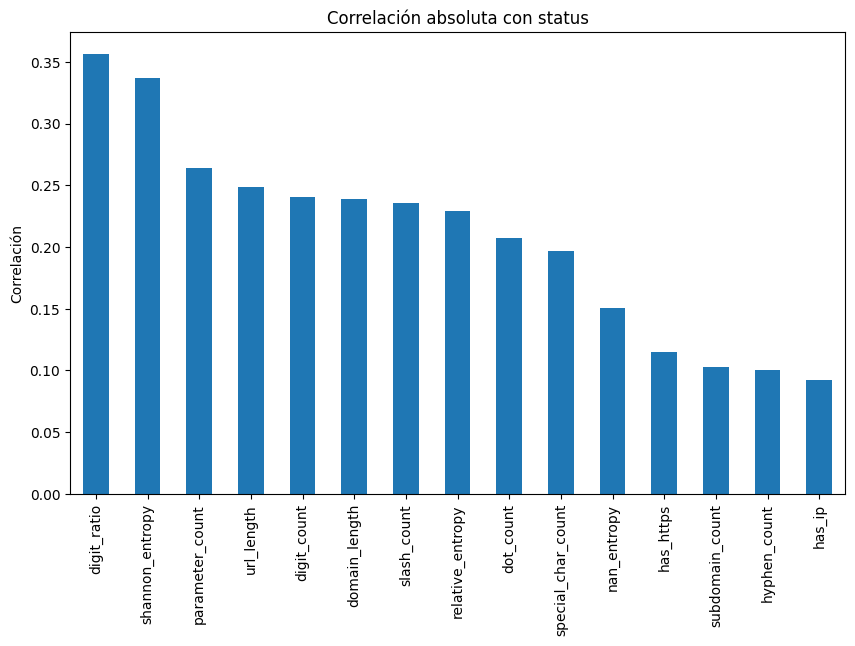

In [132]:
plt.figure(figsize=(10,6))
corr_target.drop('status').plot(kind='bar')
plt.title("Correlación absoluta con status")
plt.ylabel("Correlación")
plt.show()


In [133]:
corr_matrix = X.corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr_cols = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Columnas altamente correlacionadas:", high_corr_cols)

X = X.drop(columns=high_corr_cols)


Columnas altamente correlacionadas: []


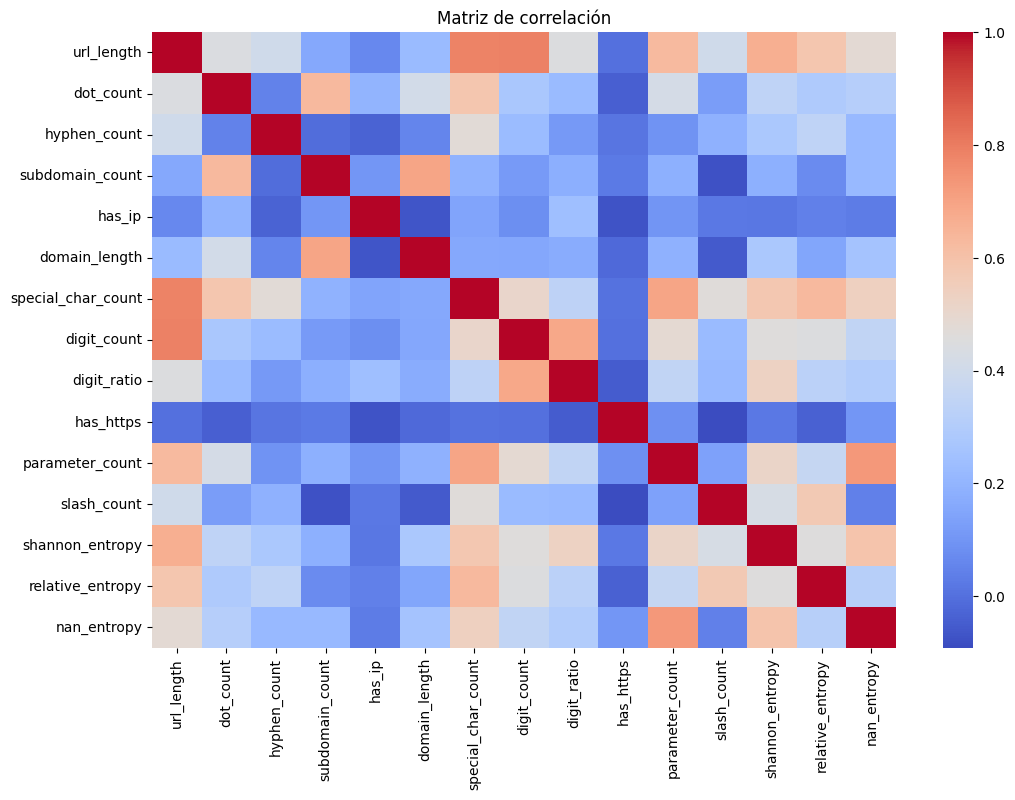

In [134]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


### Separacón de datos

In [135]:
from sklearn.model_selection import train_test_split

# X y y ya los tienes del preprocesamiento
# X -> features
# y -> target

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.45,      # 45% restante
    stratify=y,          # mantiene balance de clases
    random_state=42
)


In [136]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.6667,     # 30% final
    stratify=y_temp,
    random_state=42
)


In [137]:
print("Train:", X_train.shape[0])
print("Validation:", X_val.shape[0])
print("Test:", X_test.shape[0])

print("\nProporciones:")
print("Train %:", X_train.shape[0] / X.shape[0])
print("Validation %:", X_val.shape[0] / X.shape[0])
print("Test %:", X_test.shape[0] / X.shape[0])


Train: 6286
Validation: 1714
Test: 3430

Proporciones:
Train %: 0.5499562554680665
Validation %: 0.14995625546806648
Test %: 0.300087489063867


In [138]:
# Reunir features y target para guardar completos
train_df = X_train.copy()
train_df['status'] = y_train

val_df = X_val.copy()
val_df['status'] = y_val

test_df = X_test.copy()
test_df['status'] = y_test

# Guardar
train_df.to_csv("train_dataset.csv", index=False)
val_df.to_csv("validation_dataset.csv", index=False)
test_df.to_csv("test_dataset.csv", index=False)
